In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import pandas as pd
from skimage.metrics import mean_squared_error

In [ ]:

defined_rows_num = 20
defined_cols_num = 20


def split_image(image):
    height, width = image.shape[:2]

    frame_height = height // defined_rows_num
    frame_width = width // defined_cols_num

    frames = []

    for r in range(defined_rows_num):
        for c in range(defined_cols_num):
            start_row = r * frame_height
            end_row = start_row + frame_height
            start_col = c * frame_width
            end_col = start_col + frame_width

            frame = image[start_row:end_row, start_col:end_col]
            frames.append(frame)

    return frames


In [ ]:

def reconstruct_image(frames, rows, cols):
    frame_height, frame_width = frames[0].shape[:2]
    height = rows * frame_height
    width = cols * frame_width

    image = np.zeros((height, width, 3), dtype=np.uint8)

    for i, frame in enumerate(frames):
        r = i // cols
        c = i % cols
        start_row = r * frame_height
        end_row = start_row + frame_height
        start_col = c * frame_width
        end_col = start_col + frame_width
        image[start_row:end_row, start_col:end_col] = frame

    return image


In [ ]:

def template_matching(frame, templates):
    frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    templates_gray = []


    for template in templates:
        gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
        templates_gray.append(gray_template)

    similarity_scores = []
    similarity_locations = []
    equivalent_templates = []

    for template in templates_gray:
        w, h = template.shape[:2]
        result = cv2.matchTemplate(frame_gray, template, cv2.TM_CCOEFF_NORMED)
        _, max_similarity_val, _, max_similarity_loc = cv2.minMaxLoc(result)
        similarity_scores.append(max_similarity_val)
        similarity_locations.append(max_similarity_loc)
        img = frame[max_similarity_loc[1]:max_similarity_loc[1] + w, max_similarity_loc[0]:max_similarity_loc[0] + h]
        equivalent_templates.append(img)

    return similarity_scores , similarity_locations , equivalent_templates


## Main


In [ ]:
frame = cv2.imread('/content/pic3-dog.jpeg') # Image #1 path
template = cv2.imread('/content/transformed_2.png') # Image #2 path
templates = split_image(template)
frames_for_reconstruct = split_image(frame)
reconstructed_image = reconstruct_image(frames_for_reconstruct, defined_rows_num, defined_cols_num)

similarity_scores , similarity_locations , equivalent_templates = template_matching(reconstructed_image, templates)



###### Example for a template and it's matching (equivalent) template

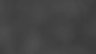

(3, 96, 54)



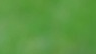

(3, 96, 54)

similarity score: 0.628


In [ ]:
cv2_imshow(templates[22])
print(templates[22].shape[::-1])
print()
cv2_imshow(equivalent_templates[22])
print(equivalent_templates[22].shape[::-1])
print()
print(f"similarity score: {round(similarity_scores[22], 3)}")

### calculating the distance


In [ ]:
mse_distance = []

for i in range(len(templates)):
  mse = np.sqrt(((templates[i] - equivalent_templates[i]) ** 2).mean())
  mse_distance.append(mse)

distance_df = pd.DataFrame(mse_distance)

min_value = distance_df.min()[0]
max_value = distance_df.max()[0]

if max_value != min_value:
  normalized_distance_df = (distance_df - min_value) / (max_value - min_value)
else:
  normalized_distance_df = distance_df
normalized_distance_score = round(normalized_distance_df.mean()[0], 3)

In [ ]:
similarity_df = pd.DataFrame(similarity_scores)
similarity_score = round(similarity_df.mean()[0], 3)
print(f"Case 1 - mean similarity score: {similarity_score} ({similarity_score * 100}%)\n")

print(f"Case 2 - normalized mean distance score: {normalized_distance_score} \n")


Case 1 - mean similarity score: 0.68 (68.0%)

Case 2 - normalized mean distance score: 0.619 

